<a href="https://colab.research.google.com/github/richiephang/crop-yield-prediction/blob/main/crop_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot

Load the dataset

In [ ]:
!wget -O yield_df.csv https://gist.githubusercontent.com/FrankieLim0528/d7644296be75220a3753a377a35f5ba3/raw/06d3afc6b3d0561cdebc26cc3ea5f3b1782ecb3b/yield_df.csv

--2022-06-05 16:51:04--  https://gist.githubusercontent.com/FrankieLim0528/d7644296be75220a3753a377a35f5ba3/raw/06d3afc6b3d0561cdebc26cc3ea5f3b1782ecb3b/yield_df.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1537132 (1.5M) [text/plain]
Saving to: ‘yield_df.csv’

yield_df.csv        100%[===================>]   1.47M  --.-KB/s    in 0.06s   

2022-06-05 16:51:05 (23.8 MB/s) - ‘yield_df.csv’ saved [1537132/1537132]



Data cleaning

In [ ]:
df_yield = pd.read_csv('yield_df.csv')
df_yield.shape
df_yield.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
# we only want potato dataset
potato_df = df_yield.loc[df_yield['Item'] == "Potatoes"]
potato_df.drop(columns=["Area", "Year", "Unnamed: 0","Item"], inplace=True)
potato_df.reset_index()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,1,66667,1485.0,121.00,16.37
1,7,77818,1485.0,121.00,15.36
2,13,82920,1485.0,121.00,16.06
3,19,98446,1485.0,121.00,16.05
4,24,81404,1485.0,201.00,16.96
...,...,...,...,...,...
4271,28204,166136,657.0,3269.99,20.52
4272,28212,166825,657.0,3305.17,21.17
4273,28220,167336,657.0,3340.35,20.78
4274,28228,171875,657.0,3375.53,20.52


In [ ]:
potato_df.to_csv("output.csv", index=False)

In [ ]:
potato = pd.read_csv('output.csv')
potato.describe()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,4276.000000,4276.000000,4276.000000,4276.000000
mean,199801.549579,1060.399205,32152.516104,19.007725
std,93382.176418,691.026858,53222.971160,7.061182
min,8406.000000,51.000000,0.040000,1.300000
25%,140233.250000,537.000000,1597.000000,13.100000
50%,182271.000000,867.000000,14485.330000,20.040000
75%,253729.000000,1513.000000,42482.560000,25.630000
max,501412.000000,3240.000000,367778.000000,30.650000


Data visualization

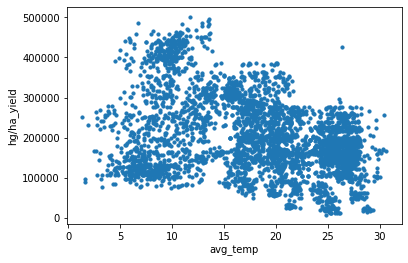

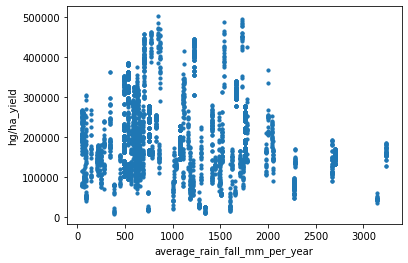

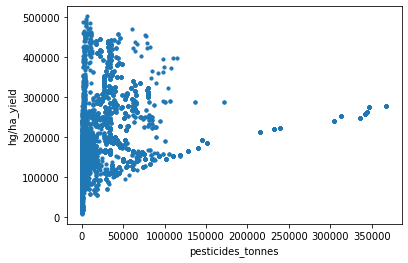

In [ ]:
import matplotlib.pyplot as plt
potato.plot.scatter(x = 'avg_temp', y = 'hg/ha_yield', s = 10);
potato.plot.scatter(x = 'average_rain_fall_mm_per_year', y = 'hg/ha_yield', s = 10);
potato.plot.scatter(x = 'pesticides_tonnes', y = 'hg/ha_yield', s = 10);

In [ ]:
import plotly.express as px
  
fig = px.scatter_3d(potato, 
                    x = 'avg_temp', 
                    y = 'pesticides_tonnes', 
                    z = 'average_rain_fall_mm_per_year',
                    color = 'hg/ha_yield')
  
fig.show()

Convert to numpy

In [ ]:
potato = pd.read_csv('output.csv')
potato.head()
potato.to_csv('potato.txt',header=False, sep='\t', index=False)
data = np.loadtxt('potato.txt', dtype=float)

In [ ]:
X = data[:, 1:]
y = data[:, 0]
m = y.size

# print out some data points
print('{:>21s}{:>21s}{:>15s}{:>15s}'.format('Avg rain fall (mm/year)', 'pesticide (tonnes)', 'Avg temp', 'hg/ha yield'))
print('-'*75)
for i in range(10):
    print('{:11.0f}{:20.0f}{:25.2f}{:15.0f}'.format(X[i, 0], X[i, 1], X[i, 2], y[i]))

Avg rain fall (mm/year)   pesticide (tonnes)       Avg temp    hg/ha yield
---------------------------------------------------------------------------
       1485                 121                    16.37          66667
       1485                 121                    15.36          77818
       1485                 121                    16.06          82920
       1485                 121                    16.05          98446
       1485                 201                    16.96          81404
       1485                 251                    15.67         111323
       1485                 314                    15.64         106138
       1485                 377                    15.90         109874
       1485                 440                    16.27         127212
       1485                 503                    16.57         142018


Feature scaling

In [ ]:
def  featureScaling(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X_norm , axis = 0)
    sigma = np.std(X_norm , axis = 0)
    X_norm = (X_norm - mu)/sigma

    return X_norm, mu, sigma

In [ ]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureScaling(X)
print('Computed mean:')
for ele in mu:
  print('{:11.5f}'.format(ele))
print('\nComputed standard deviation:')
for ele in sigma:
  print('{:11.5f}'.format(ele))

Computed mean:
 1060.39920
32152.51610
   19.00772

Computed standard deviation:
  690.94605
53216.74734
    7.06036


Data after feature scaling

In [ ]:
# print out some data points
print('{:>21s}{:>21s}{:>15s}{:>15s}'.format('Avg rain fall (mm/year)', 'pesticide (tonnes)', 'Avg temp', 'hg/ha yield'))
print('-'*75)
for i in range(10):
    print('{:11.5f}{:25.5f}{:22.5f}{:15.0f}'.format(X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], y[i]))

Avg rain fall (mm/year)   pesticide (tonnes)       Avg temp    hg/ha yield
---------------------------------------------------------------------------
    0.61452                 -0.60191              -0.37360          66667
    0.61452                 -0.60191              -0.51665          77818
    0.61452                 -0.60191              -0.41750          82920
    0.61452                 -0.60191              -0.41892          98446
    0.61452                 -0.60040              -0.29003          81404
    0.61452                 -0.59946              -0.47274         111323
    0.61452                 -0.59828              -0.47699         106138
    0.61452                 -0.59710              -0.44017         109874
    0.61452                 -0.59591              -0.38776         127212
    0.61452                 -0.59473              -0.34527         142018


In [ ]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

Cost function

In [ ]:
def computeCostMulti(X, y, theta):
    m = y.shape[0] # number of training examples
    J = 0
    J = (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Gradient descent

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0] # number of training examples
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * np.dot(X.T, np.dot(X, theta) - y)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

Model testing

theta computed from gradient descent: [199737.16905163  -6275.38742983  22712.03859413 -34596.54752086]


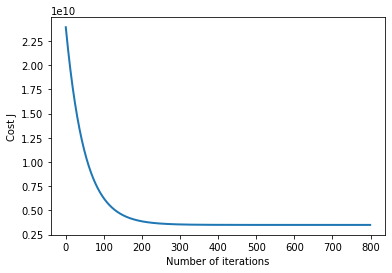

In [ ]:
# Choose some alpha value
alpha = 0.01
num_iters = 800

# init theta and run gradient descent
theta = np.zeros(4)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))


# X_test = [1, 1485.0, 121.0, 16.37]
# X_test[1:4] = (X_test[1:4] - mu) / sigma
# output_yield = np.dot(X_test, theta)

# print('Predicted yield of a 1485mm per year avg rainfall, 121 tonnes pesticide, 16.37 temp (using gradient descent): {:.5f} hg/ha'.format(output_yield))

Model Evaluation

In [ ]:
def predict(X, w):
    return X.dot(w)
y_pred = predict(X,theta)

In [ ]:
print("Model score (r square):")
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, y)

Model score (r square):


0.19649572894961465